In [8]:
import SpykeMapper as SM

Welcome to SpykeMapper! SpykeMapper provides a class for processing voltage imaging data. The data should be organized in an Excel workbook where the first column is time and every other column is an individual neuron. SpykeMapper uses multi-indexing to deal with nested experimental designs, so please organize your data such that each workbook represents a single sample group and each worksheet within the workbook represents neurons from a single field of view imaged simultaneously.

Run the following block to import your data. SpykeMapper will initialize an instance of the VoltageTraceData class and ask you to select an Excel workbook containing your data. It also measures the time it takes to import the data for your edification.

In [41]:
SampleData = SM.VoltageTraceData()
SampleData.import_data()

Excel
What XLSX workbook do you want to open?
5.003142833709717


Your raw data is now contained in a multi-indexed pandas dataframe contained in the instance variable self.RawData. You can look at the first few columns by running the following block. Note that the columns are indexed by both cell number and worksheet.

In [42]:
SampleData.RawData.head()

FOV A                                                     \
                Cell 1    Cell 2    Cell 3     Cell 4    Cell 5    Cell 6   
Time (2 ms)                                                                 
1            3087.0059  3084.220  2968.463  3146.5522  2909.309  3807.177   
2            3098.8809  3093.119  2981.836  3145.8391  2911.740  3810.386   
3            3092.3154  3087.744  2978.035  3148.8218  2911.412  3822.949   
4            3084.4106  3091.071  2977.254  3145.3608  2917.054  3818.075   
5            3085.7976  3093.582  2976.692  3142.6042  2910.515  3821.014   

                                                        ...      FOV F  \
                Cell 7    Cell 8    Cell 9     Cell 10  ...    Cell 13   
Time (2 ms)                                             ...              
1            3349.9387  3215.7878  3192.231  3220.0125  ...  2534.3623   
2            3346.3674  3227.4026  3201.758  3225.1208  ...  2529.9531   
3            3353.0408  3221.4675  3208.517  3220.4624  ...  2530.9397   
4            3351.2603  3219.5757  3194.264  3217.3501  ...  2531.7046   
5            3355.5969  3229.7966  3191.632  3220.1416  ...  2530.4766   

                            FOV G                                            \
               Cell 14     Cell 1    Cell 2     Cell 3    Cell 4     Cell 5   
Time (2 ms)                                                                   
1            2725.3369  2712.8125  2483.723  2918.8882  3070.840  2954.0486   
2            2721.9282  2716.5803  2478.907  2917.3630  3069.420  2956.5625   
3            2720.3811  2710.3660  2485.828  2916.4023  3070.573  2959.1667   
4            2724.0276  2704.8481  2481.147  2915.5195  3086.407  2958.3958   
5            2717.6133  2707.2947  2483.538  2920.2458  3069.407  2955.8403   

                                              
                Cell 6     Cell 7     Cell 8  
Time (2 ms)                                   
1            2587.7000  3513.7681  2751.2100  
2            2586.9333  3512.9348  2758.1919  
3            2589.2932  3519.5725  2761.3469  
4            2581.1868  3515.9421  2756.0730  
5            2588.3000  3517.1956  2762.1643  

[5 rows x 87 columns]

The next command uses three class methods to convert the raw data into a number of separate traces. Run the next block of code to examine them in more detail. 

In [43]:
SampleData.preprocess_data()

First, the process_raw() method uses symmetric least squares regression to model the subthreshold activity underlying the neuronal spiking. It generates a self.SubThreshold variable containing this fit and a self.Spikes variable, which is self.RawData divided by self.SubThreshold. This is more easily visualized by looking at plots of the first cell in the data.

The blue line represents the raw fluorescence trace, while the red line represents the modeled subthreshold behavior. The relative smoothness of this fit can be adjusted by running the process_raw() method with smooth and weight arguments. The default for smooth is 5000 and weight is 0.01.

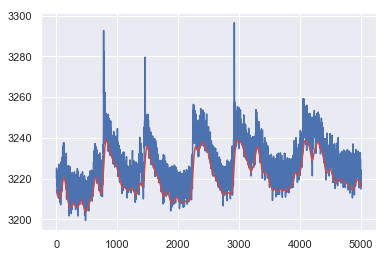

In [59]:
import matplotlib.pyplot as plt
plt.plot(SampleData.RawData.index, SampleData.RawData.iloc[:,9], color='b')
plt.plot(SampleData.SubThreshold.index, SampleData.SubThreshold.iloc[:,9], color='r')

The self.Spikes trace now contains the spiking behavior and photon shot noise due to the detector.

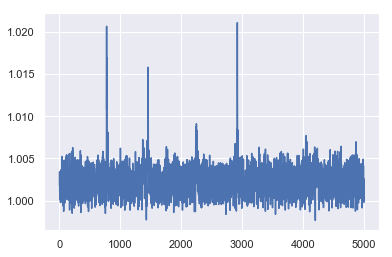

In [60]:
plt.plot(SampleData.Spikes.index, SampleData.Spikes.iloc[:,9], color='b')

The next class method within preprocess_data() is make_spiketrain(), which thresholds the spike data to generate a binary spiketrain by looking for local maxima (within 2 datapoints) that are greater than 4.5x the standard deviation of the noise. This generates the instance variable self.SpikeTrain.

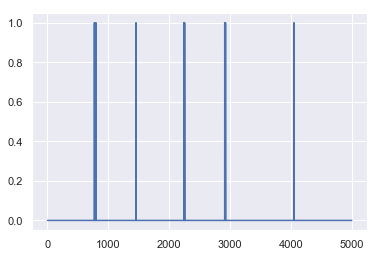

In [61]:
plt.plot(SampleData.SpikeTrain.index, SampleData.SpikeTrain.iloc[:,9], color='b')

The final class method within preprocess_data() is normalize_subthreshold(), which generates the instance variable self.NormSubThresh. This normalizes each of the subthreshold traces by adjusting their mean to 1 by dividing them by their average fluorescence. 

Note: This does not make the data stationary, nor does it z-score it. It simply converts the raw subthreshold fit into a change in fluorescence graph, which is useful for a number of analyses and not very useful for others. 

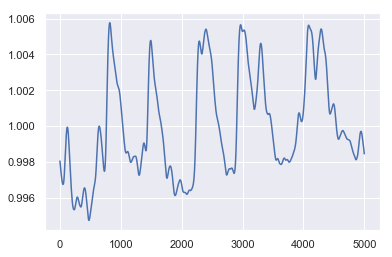

In [63]:
plt.plot(SampleData.NormSubThresh.index, SampleData.NormSubThresh.iloc[:,9], color='b')

If you want to detrend the data for further analysis, the best strategy is likely to do it by background subtracting your fluorescence videos rather than doing it posthoc in here.